## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt

# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()
print(application_df.columns)

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [2]:
# Set variable for 'name_count' for later use
name_count = application_df.NAME.value_counts()

(-754.4, 500.0)

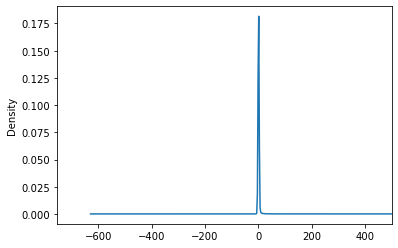

In [3]:
# Plot to see density of names that are less than 500
application_df.NAME.value_counts().plot.density()
plt.xlim(right = 500)

In [4]:
# Calculated percentage of data to bin if set cutoff at less than seven times each company applied.
len(name_count[name_count < 7])/len(name_count)

0.9839022894521668

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_application = application_df.drop(['EIN'], axis = 1)
print(df_application.columns)
df_application.head()

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
df_application.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [7]:
# Determine the number of unique values in each column.
df_application.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [8]:
df_application[['APPLICATION_TYPE', 'CLASSIFICATION', 'ASK_AMT']].value_counts()

APPLICATION_TYPE  CLASSIFICATION  ASK_AMT 
T3                C1000           5000        8471
                  C2000           5000        3946
                  C1200           5000        3901
                  C2100           5000        1578
T19               C1000           5000         994
                                              ... 
T3                C2000           36821          1
                                  37216          1
                                  37226          1
                                  37309          1
                  C1000           70915708       1
Length: 8952, dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
at_to_bin = df_application['APPLICATION_TYPE'].value_counts()
at_to_bin

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(at_to_bin[at_to_bin < 528].index)

# Replace in dataframe
for app in application_types_to_replace:
    df_application['APPLICATION_TYPE'] = df_application['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df_application['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
names_to_replace = list(name_count[name_count < 7].index)

# Replace in dataframe
for app in names_to_replace:
    df_application['NAME'] = df_application['NAME'].replace(app,"Other")

# Check to make sure binning was successful
df_application['NAME'].value_counts()

Other                                                  20277
PARENT BOOSTER USA INC                                  1260
TOPS CLUB INC                                            765
UNITED STATES BOWLING CONGRESS INC                       700
WASHINGTON STATE UNIVERSITY                              492
                                                       ...  
ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION        7
KAPPA KAPPA PSI FRATERNITY                                 7
NATIONAL CHARITY LEAGUE                                    7
ZETA PHI BETA SORORITY                                     7
MYTEAM TRIUMPH INC                                         7
Name: NAME, Length: 316, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
cl_to_bin = df_application['CLASSIFICATION'].value_counts()
cl_to_bin

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1283        1
C1248        1
C2561        1
C2190        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df_application['CLASSIFICATION'].value_counts()[df_application['CLASSIFICATION'].value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C2710        3
C0           3
C1260        3
C1267        2
C1256        2
C1234        2
C3200        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [14]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(cl_to_bin[cl_to_bin < 1883 ].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df_application['CLASSIFICATION'] = df_application['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df_application['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
df_dummy = pd.get_dummies(df_application)

In [16]:
df_dummy.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
# Split our preprocessed data into our features and target arrays
print(df_dummy.columns)

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'NAME_AACE INTERNATIONAL',
       'NAME_ACE MENTOR PROGRAM OF AMERICA INC',
       'NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS',
       'NAME_AIR FORCE ASSOCIATION', 'NAME_ALABAMA FEDERATION OF WOMENS CLUBS',
       'NAME_ALABAMA TREASURE FOREST ASSOCIATION',
       'NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=360)


In [18]:
X_df_dummy = df_dummy.drop(['IS_SUCCESSFUL'], axis = 1)
y_df_dummy = df_dummy['IS_SUCCESSFUL']
X_df_dummy

,STATUS,ASK_AMT,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_df_dummy, y_df_dummy, random_state=1)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [21]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=len(X_train_scaled[0])))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=6),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compiling the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn

In [22]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [23]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 35s]
val_accuracy: 0.7889212965965271

Best val_accuracy So Far: 0.792303204536438
Total elapsed time: 00h 29m 41s
INFO:tensorflow:Oracle triggered exit


In [24]:
# Top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 11, 'num_layers': 3, 'units_0': 1, 'units_1': 13, 'units_2': 25, 'units_3': 13, 'units_4': 13, 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 16, 'num_layers': 3, 'units_0': 25, 'units_1': 25, 'units_2': 7, 'units_3': 13, 'units_4': 19, 'units_5': 7, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '2408b22728a6f5cece614f5c586526e1'}
{'activation': 'tanh', 'first_units': 21, 'num_layers': 5, 'units_0': 1, 'units_1': 19, 'units_2': 7, 'units_3': 7, 'units_4': 7, 'units_5': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [25]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4428 - accuracy: 0.7923
Loss: 0.4427569508552551, Accuracy: 0.792303204536438
268/268 - 0s - loss: 0.4412 - accuracy: 0.7923
Loss: 0.4412344992160797, Accuracy: 0.792303204536438
268/268 - 0s - loss: 0.4381 - accuracy: 0.7922
Loss: 0.4381037950515747, Accuracy: 0.7921866178512573


In [26]:
# Looked at second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[1]
second_hyper.values

{'activation': 'relu',
 'first_units': 16,
 'num_layers': 3,
 'units_0': 25,
 'units_1': 25,
 'units_2': 7,
 'units_3': 13,
 'units_4': 19,
 'units_5': 7,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '2408b22728a6f5cece614f5c586526e1'}

In [27]:
# Compare the performance to the second-best model
second_model = tuner.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4412 - accuracy: 0.7923
Loss: 0.4412344992160797, Accuracy: 0.792303204536438


In [28]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
model.save("AlphabetSoupCharity_Optimization.h5")